In [1]:
import pandas as pd
import numpy as np
import os
import pickle

def summarize_metrics(path, show_train=True, show_test=True, show_scalar=True, runs=11):
    results = pd.read_pickle(path)

    train_metric_sums = {}
    test_metric_sums = {}
    scalar_sums = {
        'training_time_sec': 0.0,
        'gpu_mem_MB': 0.0,
        'cpu_mem_MB': 0.0,
        'param_count': 0.0
    }

    count = 0
    for run in range(runs):
        if run not in results:
            continue
        entry = results[run]
        count += 1

        for key in scalar_sums:
            scalar_sums[key] += entry.get(key, 0.0)

        for k, v in entry.get('train_metrics', {}).items():
            train_metric_sums[k] = train_metric_sums.get(k, 0.0) + float(v)

        for k, v in entry.get('test_metrics', {}).items():
            test_metric_sums[k] = test_metric_sums.get(k, 0.0) + float(v)

    # 평균 계산
    scalar_avg = {f"avg_{k}": round(v / count, 2) for k, v in scalar_sums.items()} if show_scalar else {}
    train_avg = {f"train_{k}": round(v / count, 2) for k, v in train_metric_sums.items()} if show_train else {}
    test_avg = {f"test_{k}": round(v / count, 2) for k, v in test_metric_sums.items()} if show_test else {}

    # 통합 및 DataFrame 변환
    all_metrics = {**scalar_avg, **train_avg, **test_avg}
    df = pd.DataFrame([all_metrics])

    return df

dataset_order = [
    "basic", "gaussian", "uniform", "outlier", "edge", "BA", "ER", "grid", "tree",
    "education", "election", "income", "unemployment",
    "PTBR", "chameleon", "crocodile", "squirrel", "Anaheim", "ChicagoSketch"
]

def get_dataset_index(filename):
    for i, name in enumerate(dataset_order):
        if name in filename:
            return i
    return len(dataset_order)  # 못 찾은 건 맨 뒤로

def summarize_model_resources(path, runs=11):
    results = pd.read_pickle(path)

    models = ['gnn', 'conf_gnn']
    scalar_keys = ['training_time_sec', 'gpu_mem_MB', 'cpu_mem_MB', 'param_count']

    # 모델별 누적 딕셔너리 초기화
    model_sums = {model: {k: 0.0 for k in scalar_keys} for model in models}
    model_counts = {model: 0 for model in models}

    for run in range(runs):
        if run not in results:
            continue
        for model in models:
            entry = results[run].get(model, {})
            if not entry:
                continue
            model_counts[model] += 1
            for key in scalar_keys:
                model_sums[model][key] += entry.get(key, 0.0)

    # 평균 계산
    model_avgs = {}
    for model in models:
        if model_counts[model] == 0:
            continue
        avg_metrics = {
            f"{model}_{k}": round(v / model_counts[model], 4)
            for k, v in model_sums[model].items()
        }
        model_avgs.update(avg_metrics)

    df = pd.DataFrame([model_avgs])
    return df

## Alone Model

### SQR

In [2]:
train, test, scalar = False, True, False

folder_path = "/home/sypark/QpiGNN/training/pred (0401)/SQR"
pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl')]
sorted_pkl_files = sorted(pkl_files, key=get_dataset_index)

In [4]:
for i in range(len(pkl_files)):
    print('SQR', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 6:].T)
    print('-' * 30)


SQR basic_SQR.pkl Results...
                   0
test_Sharpness  0.14
test_WS         0.33
------------------------------
SQR gaussian_SQR.pkl Results...
                   0
test_Sharpness  0.26
test_WS         0.51
------------------------------
SQR uniform_SQR.pkl Results...
                   0
test_Sharpness  0.27
test_WS         0.52
------------------------------
SQR outlier_SQR.pkl Results...
                   0
test_Sharpness  0.01
test_WS         0.12
------------------------------
SQR edge_SQR.pkl Results...
                   0
test_Sharpness  0.13
test_WS         0.32
------------------------------
SQR BA_SQR.pkl Results...
                   0
test_Sharpness  0.54
test_WS         0.73
------------------------------
SQR ER_SQR.pkl Results...
                   0
test_Sharpness  0.38
test_WS         0.61
------------------------------
SQR grid_SQR.pkl Results...
                   0
test_Sharpness  0.29
test_WS         0.55
------------------------------
SQR tree_SQR.pkl 

In [80]:
for i in range(len(pkl_files)):
    print('SQR', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 5:].T)
    print('-' * 30)

SQR basic_SQR.pkl Results...
                   0
test_MPE        0.09
test_Sharpness  0.14
test_WS         0.33
------------------------------
SQR gaussian_SQR.pkl Results...
                   0
test_MPE        0.13
test_Sharpness  0.26
test_WS         0.51
------------------------------
SQR uniform_SQR.pkl Results...
                   0
test_MPE        0.13
test_Sharpness  0.27
test_WS         0.52
------------------------------
SQR outlier_SQR.pkl Results...
                   0
test_MPE        0.05
test_Sharpness  0.01
test_WS         0.12
------------------------------
SQR edge_SQR.pkl Results...
                   0
test_MPE        0.08
test_Sharpness  0.13
test_WS         0.32
------------------------------
SQR BA_SQR.pkl Results...
                   0
test_MPE        0.25
test_Sharpness  0.54
test_WS         0.73
------------------------------
SQR ER_SQR.pkl Results...
                   0
test_MPE        0.21
test_Sharpness  0.38
test_WS         0.61
-----------------------

### RQR

In [5]:
train, test, scalar = False, True, False

folder_path = "/home/sypark/QpiGNN/training/pred (0401)/RQR"
pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl')]
sorted_pkl_files = sorted(pkl_files, key=get_dataset_index)

In [83]:
for i in range(len(pkl_files)):
    print('RQR', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 3:5].T) 
    print('-' * 30)

RQR basic_RQR.pkl Results...
             0
test_MCT  0.00
test_CWC  1.66
------------------------------
RQR gaussian_RQR.pkl Results...
             0
test_MCT  0.01
test_CWC  1.34
------------------------------
RQR uniform_RQR.pkl Results...
             0
test_MCT  0.00
test_CWC  1.48
------------------------------
RQR outlier_RQR.pkl Results...
             0
test_MCT  0.00
test_CWC  0.71
------------------------------
RQR edge_RQR.pkl Results...
             0
test_MCT  0.03
test_CWC  1.43
------------------------------
RQR BA_RQR.pkl Results...
             0
test_MCT  0.09
test_CWC  3.41
------------------------------
RQR ER_RQR.pkl Results...
             0
test_MCT  0.01
test_CWC  1.77
------------------------------
RQR grid_RQR.pkl Results...
             0
test_MCT  0.09
test_CWC  3.87
------------------------------
RQR tree_RQR.pkl Results...
             0
test_MCT  0.04
test_CWC  2.14
------------------------------
RQR education_RQR.pkl Results...
             0
test_MCT 

In [6]:
for i in range(len(pkl_files)):
    print('RQR', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 6:].T) 
    print('-' * 30)

RQR basic_RQR.pkl Results...
                   0
test_Sharpness  0.67
test_WS         0.82
------------------------------
RQR gaussian_RQR.pkl Results...
                   0
test_Sharpness  0.29
test_WS         0.54
------------------------------
RQR uniform_RQR.pkl Results...
                   0
test_Sharpness  0.46
test_WS         0.68
------------------------------
RQR outlier_RQR.pkl Results...
                   0
test_Sharpness  0.13
test_WS         0.37
------------------------------
RQR edge_RQR.pkl Results...
                   0
test_Sharpness  0.68
test_WS         0.83
------------------------------
RQR BA_RQR.pkl Results...
                   0
test_Sharpness  0.57
test_WS         0.76
------------------------------
RQR ER_RQR.pkl Results...
                   0
test_Sharpness  0.60
test_WS         0.78
------------------------------
RQR grid_RQR.pkl Results...
                   0
test_Sharpness  0.25
test_WS         0.52
------------------------------
RQR tree_RQR.pkl 

### BNN

In [7]:
train, test, scalar = False, True, False

folder_path = "/home/sypark/QpiGNN/training/pred (0401)/BNN"
pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl')]
sorted_pkl_files = sorted(pkl_files, key=get_dataset_index)

In [18]:
for i in range(len(pkl_files)):
    print('BNN', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 3:5].T) 
    print('-' * 30)

BNN basic_BNN.pkl Results...
             0
test_MCT  0.30
test_CWC  4.15
------------------------------
BNN gaussian_BNN.pkl Results...
             0
test_MCT  0.30
test_CWC  4.63
------------------------------
BNN uniform_BNN.pkl Results...
             0
test_MCT  0.30
test_CWC  4.39
------------------------------
BNN outlier_BNN.pkl Results...
             0
test_MCT  0.29
test_CWC  3.94
------------------------------
BNN edge_BNN.pkl Results...
             0
test_MCT  0.31
test_CWC  4.22
------------------------------
BNN BA_BNN.pkl Results...
             0
test_MCT  0.31
test_CWC  4.43
------------------------------
BNN ER_BNN.pkl Results...
             0
test_MCT  0.30
test_CWC  4.34
------------------------------
BNN grid_BNN.pkl Results...
             0
test_MCT  0.30
test_CWC  4.53
------------------------------
BNN tree_BNN.pkl Results...
             0
test_MCT  0.30
test_CWC  4.79
------------------------------
BNN education_BNN.pkl Results...
             0
test_MCT 

In [8]:
for i in range(len(pkl_files)):
    print('BNN', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 6:].T) 
    print('-' * 30)

BNN basic_BNN.pkl Results...
                   0
test_Sharpness  9.08
test_WS         3.01
------------------------------
BNN gaussian_BNN.pkl Results...
                   0
test_Sharpness  8.92
test_WS         2.98
------------------------------
BNN uniform_BNN.pkl Results...
                   0
test_Sharpness  9.02
test_WS         3.00
------------------------------
BNN outlier_BNN.pkl Results...
                   0
test_Sharpness  8.72
test_WS         2.95
------------------------------
BNN edge_BNN.pkl Results...
                   0
test_Sharpness  9.37
test_WS         3.06
------------------------------
BNN BA_BNN.pkl Results...
                   0
test_Sharpness  9.50
test_WS         3.08
------------------------------
BNN ER_BNN.pkl Results...
                   0
test_Sharpness  9.09
test_WS         3.01
------------------------------
BNN grid_BNN.pkl Results...
                   0
test_Sharpness  9.11
test_WS         3.01
------------------------------
BNN tree_BNN.pkl 

### MC

In [9]:
train, test, scalar = False, True, False

folder_path = "/home/sypark/QpiGNN/training/pred/MC"
pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl')]
sorted_pkl_files = sorted(pkl_files, key=get_dataset_index)

In [207]:
for i in range(len(pkl_files)):
    print('MC', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, :2].T) 
    print('-' * 30)

MC basic_MC.pkl Results...
              0
test_PICP  0.99
test_MPIW  0.32
------------------------------
MC gaussian_MC.pkl Results...
              0
test_PICP  0.55
test_MPIW  0.20
------------------------------
MC uniform_MC.pkl Results...
              0
test_PICP  0.65
test_MPIW  0.26
------------------------------
MC outlier_MC.pkl Results...
              0
test_PICP  0.58
test_MPIW  0.06
------------------------------
MC edge_MC.pkl Results...
             0
test_PICP  1.0
test_MPIW  0.3
------------------------------
MC BA_MC.pkl Results...
              0
test_PICP  0.67
test_MPIW  0.26
------------------------------
MC ER_MC.pkl Results...
              0
test_PICP  0.76
test_MPIW  0.23
------------------------------
MC grid_MC.pkl Results...
              0
test_PICP  0.33
test_MPIW  0.16
------------------------------
MC tree_MC.pkl Results...
              0
test_PICP  0.64
test_MPIW  0.20
------------------------------
MC education_MC.pkl Results...
              0
test

In [10]:
for i in range(len(pkl_files)):
    print('MC', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 6:].T) 
    print('-' * 30)

MC basic_MC.pkl Results...
                   0
test_Sharpness  0.10
test_WS         0.32
------------------------------
MC gaussian_MC.pkl Results...
                   0
test_Sharpness  0.04
test_WS         0.24
------------------------------
MC uniform_MC.pkl Results...
                   0
test_Sharpness  0.07
test_WS         0.27
------------------------------
MC outlier_MC.pkl Results...
                   0
test_Sharpness  0.00
test_WS         0.09
------------------------------
MC edge_MC.pkl Results...
                   0
test_Sharpness  0.09
test_WS         0.30
------------------------------
MC BA_MC.pkl Results...
                   0
test_Sharpness  0.07
test_WS         0.30
------------------------------
MC ER_MC.pkl Results...
                   0
test_Sharpness  0.07
test_WS         0.24
------------------------------
MC grid_MC.pkl Results...
                   0
test_Sharpness  0.03
test_WS         0.24
------------------------------
MC tree_MC.pkl Results...
       

### CF-GNN

In [14]:
train, test, scalar = False, True, False

folder_path = "/home/sypark/QpiGNN/training/pred (0401)/CF-GNN (opt)"
pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl')]
sorted_pkl_files = sorted(pkl_files, key=get_dataset_index)

In [26]:
for i in range(len(pkl_files)):
    print('CF-GNN', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 3:5].T) 
    print('-' * 30)

CF-GNN optimal_education_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
             0
test_MCT  0.05
test_CWC  0.98
------------------------------
CF-GNN optimal_election_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
             0
test_MCT  0.02
test_CWC  1.03
------------------------------
CF-GNN optimal_income_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
             0
test_MCT  0.06
test_CWC  0.81
------------------------------
CF-GNN optimal_unemployment_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
             0
test_MCT  0.04
test_CWC  0.73
------------------------------
CF-GNN optimal_PTBR_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
             0
test_MCT  0.04
test_CWC  0.75
------------------------------
CF-GNN optimal_Anaheim_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
             0
test_MCT  0.09
test_CWC  1.37
------------------------------
CF-GNN optimal_ChicagoSketch_GraphSAGE_conftr_calib_holdout_confgnn.pkl Result

In [15]:
for i in range(len(pkl_files)):
    print('CF-GNN', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 6:].T) 
    print('-' * 30)

CF-GNN optimal_education_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
                    0
test_Sharpness  11.82
test_WS          3.14
------------------------------
CF-GNN optimal_election_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
                   0
test_Sharpness  0.90
test_WS         0.96
------------------------------
CF-GNN optimal_income_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
                   0
test_Sharpness  8.63
test_WS         2.97
------------------------------
CF-GNN optimal_unemployment_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
                   0
test_Sharpness  6.88
test_WS         2.69
------------------------------
CF-GNN optimal_PTBR_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
                   0
test_Sharpness  5.58
test_WS         2.38
------------------------------
CF-GNN optimal_Anaheim_GraphSAGE_conftr_calib_holdout_confgnn.pkl Results...
                   0
test_Sharpness  8.17
test_WS         2.8

### GQNN

In [17]:
train, test, scalar = False, True, False

folder_path = "/home/sypark/QpiGNN/training/pred/GQNN (opt)"
pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl')]
sorted_pkl_files = sorted(pkl_files, key=get_dataset_index)

In [200]:
for i in range(len(pkl_files)):
    print('GQNN', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, :2].T) 
    print('-' * 30)

GQNN basic_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.89
test_MPIW  0.30
------------------------------
GQNN gaussian_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.92
test_MPIW  0.55
------------------------------
GQNN uniform_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.88
test_MPIW  0.43
------------------------------
GQNN outlier_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.89
test_MPIW  0.47
------------------------------
GQNN edge_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.94
test_MPIW  0.39
------------------------------
GQNN BA_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.98
test_MPIW  0.49
------------------------------
GQNN ER_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.98
test_MPIW  0.63
------------------------------
GQNN grid_GQNN_lf(0.5).pkl Results...
              0
test_PICP  0.98
test_MPIW  0.87
------------------------------
GQNN tree_GQNN_lf(0.5).pkl Results...
              0
tes

In [19]:
for i in range(len(pkl_files)):
    print('GQNN', sorted_pkl_files[i], 'Results...')
    path = os.path.join(folder_path, sorted_pkl_files[i])
    print(summarize_metrics(path=path, show_train=train, show_test=test, show_scalar=scalar).iloc[:, 4:].T)
    print('-' * 30)

GQNN basic_GQNN_lf(0.5).pkl Results...
                   0
test_CWC        0.62
test_MPE        0.08
test_Sharpness  0.10
test_WS         0.31
------------------------------
GQNN gaussian_GQNN_lf(0.4138104425733616).pkl Results...
                   0
test_CWC        1.18
test_MPE        0.14
test_Sharpness  0.42
test_WS         0.65
------------------------------
GQNN uniform_GQNN_lf(0.4219539587333436).pkl Results...
                   0
test_CWC        1.16
test_MPE        0.14
test_Sharpness  0.39
test_WS         0.62
------------------------------
GQNN outlier_GQNN_lf(0.4875949385233997).pkl Results...
                   0
test_CWC        1.00
test_MPE        0.19
test_Sharpness  0.25
test_WS         0.49
------------------------------
GQNN edge_GQNN_lf(0.4876486614287063).pkl Results...
                   0
test_CWC        0.91
test_MPE        0.14
test_Sharpness  0.30
test_WS         0.54
------------------------------
GQNN BA_GQNN_lf(0.5).pkl Results...
                   0
te

## Ablation

In [110]:
def summarize_ablation_results(result_dir):
    rows = []

    for fname in os.listdir(result_dir):
        if not fname.endswith('.pkl'):
            continue

        config_name = fname.replace('.pkl', '')
        with open(os.path.join(result_dir, fname), 'rb') as f:
            results = pickle.load(f)

        for run_id, result in results.items():
            row = {'config': config_name, 'run': run_id}

            # 기본 성능 지표
            for k, v in result['test_metrics'].items():
                row[f'test_{k}'] = v

            # loss 항목
            if 'loss_terms' in result:
                for k, v in result['loss_terms'].items():
                    row[f'loss_{k}'] = v

            # 기타
            row['train_time_sec'] = result.get('training_time_sec', None)
            row['gpu_mem_MB'] = result.get('gpu_mem_MB', None)
            row['param_count'] = result.get('param_count', None)

            rows.append(row)

    df = pd.DataFrame(rows)
    return df

ablation = 'ablation'
dataset = 'tree'

# result_dir = f"../analysis/ablation/{dataset}/"
# df_summary = summarize_ablation_results(result_dir)
# df_summary.to_csv(f"../analysis/ablation/{dataset}_ablation_summary.csv", index=False)
# print("Ablation summary saved to CSV.")

configs_to_include_arch = [
    "dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1)",
    "dual_output(1)_fixed_margin(0.05)_use_coverage_loss(1)_use_width_loss(1)",
    "dual_output(1)_fixed_margin(0.10)_use_coverage_loss(1)_use_width_loss(1)",
    "dual_output(0)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1)",
]

configs_to_include_loss = [
    "dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1)",  # Full
    "dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(0)",  # No width
    "dual_output(1)_fixed_margin(None)_use_coverage_loss(0)_use_width_loss(1)",  # No coverage
    "dual_output(1)_fixed_margin(None)_use_coverage_loss(0)_use_width_loss(0)",  # No loss (→ MSE fallback)
]

configs_all = configs_to_include_arch + configs_to_include_loss

In [111]:
pd.read_csv(f"../analysis/{ablation}/{dataset}_ablation_summary.csv").groupby('config').mean().round(2).loc[configs_to_include_arch].iloc[:, :3]

,run,test_PCIP,test_MPIW
config,,,
dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1),2.0,0.96,0.39
dual_output(1)_fixed_margin(0.05)_use_coverage_loss(1)_use_width_loss(1),2.0,0.32,0.10
dual_output(1)_fixed_margin(0.10)_use_coverage_loss(1)_use_width_loss(1),2.0,0.67,0.20
dual_output(0)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1),2.0,0.06,0.02


In [112]:
pd.read_csv(f"../analysis/ablation/{dataset}_ablation_summary.csv").groupby('config').mean().round(2).loc[configs_to_include_loss].iloc[:, :3]

,run,test_PCIP,test_MPIW
config,,,
dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1),2.0,0.96,0.39
dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(0),2.0,1.00,1.10
dual_output(1)_fixed_margin(None)_use_coverage_loss(0)_use_width_loss(1),2.0,0.00,0.01
dual_output(1)_fixed_margin(None)_use_coverage_loss(0)_use_width_loss(0),2.0,1.00,1.00


/tmp/ipykernel_346534/899135711.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Dark2", len(all_configs))


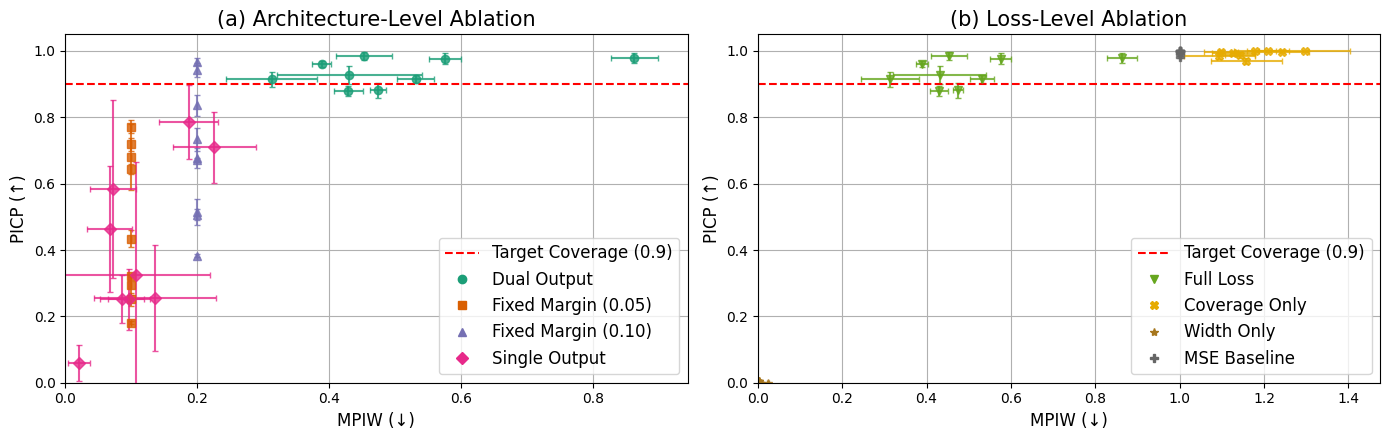

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 설정
datasets = ['basic', 'gaussian', 'uniform', 'outlier', 'edge', 'ER', 'BA', 'grid', 'tree']
result_dir_base = "../analysis/ablation"
picp_col = "test_PCIP"
mpiw_col = "test_MPIW"

# config들
architecture_variants = {
    "Dual Output": "dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1)",
    "Fixed Margin (0.05)": "dual_output(1)_fixed_margin(0.05)_use_coverage_loss(1)_use_width_loss(1)",
    "Fixed Margin (0.10)": "dual_output(1)_fixed_margin(0.10)_use_coverage_loss(1)_use_width_loss(1)",
    "Single Output": "dual_output(0)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1)",
}

loss_variants = {
    "Full Loss": "dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(1)",
    "Coverage Only": "dual_output(1)_fixed_margin(None)_use_coverage_loss(1)_use_width_loss(0)",
    "Width Only": "dual_output(1)_fixed_margin(None)_use_coverage_loss(0)_use_width_loss(1)",
    "MSE Baseline": "dual_output(1)_fixed_margin(None)_use_coverage_loss(0)_use_width_loss(0)",
}

# 전역 설정
config_color_map = {}
config_marker_map = {}
all_configs = list(architecture_variants.keys()) + list(loss_variants.keys())
cmap = plt.cm.get_cmap("Dark2", len(all_configs))
marker_list = ['o', 's', '^', 'D', 'v', 'X', '*', 'P', 'h']

for i, config_name in enumerate(all_configs):
    config_color_map[config_name] = cmap(i)
    config_marker_map[config_name] = marker_list[i % len(marker_list)]

def plot_dataset_scatter(ax, config_dict, title):
    for config_label, config_key in config_dict.items():
        color = config_color_map[config_label]
        marker = config_marker_map[config_label]

        for dataset in datasets:
            csv_path = os.path.join(result_dir_base, f"{dataset}_ablation_summary.csv")
            if not os.path.exists(csv_path):
                continue
            df = pd.read_csv(csv_path)
            df_config = df[df["config"] == config_key]
            if df_config.empty:
                continue

            picp_mean = df_config[picp_col].mean()
            picp_std = df_config[picp_col].std()
            mpiw_mean = df_config[mpiw_col].mean()
            mpiw_std = df_config[mpiw_col].std()

            # 점 찍기
            ax.errorbar(mpiw_mean, picp_mean,
                        xerr=mpiw_std, yerr=picp_std,
                        fmt=marker, color=color,
                        capsize=2, alpha=0.8)

        # legend용
        ax.errorbar([], [], fmt=marker, color=color, label=config_label)

    ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5, label='Target Coverage (0.9)')
    ax.set_xlabel("MPIW (↓)", fontsize=12)
    ax.set_ylabel("PICP (↑)", fontsize=12)
    ax.set_title(title)
    ax.set_xlim(left=0)
    ax.set_ylim([0, 1.05])
    ax.grid(True)
    ax.legend(loc='lower right', fontsize=12)

# 실행
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5))
plot_dataset_scatter(ax1, architecture_variants, "(a) Architecture-Level Ablation")
plot_dataset_scatter(ax2, loss_variants, "(b) Loss-Level Ablation")

ax1.title.set_fontsize(15)
ax2.title.set_fontsize(15)

plt.tight_layout()
plt.savefig("../analysis/ablation/ablation_tradeoff_plot.pdf")
plt.show()

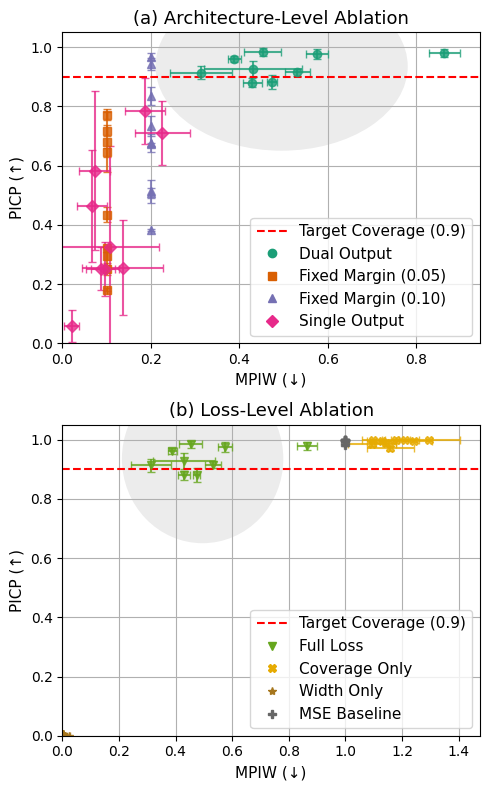

In [18]:
def plot_dataset_scatter(ax, config_dict, title, highlight_config=None):
    highlight_coords = []  # 중심 좌표 수집용

    for config_label, config_key in config_dict.items():
        color = config_color_map[config_label]
        marker = config_marker_map[config_label]

        for dataset in datasets:
            csv_path = os.path.join(result_dir_base, f"{dataset}_ablation_summary.csv")
            if not os.path.exists(csv_path):
                continue
            df = pd.read_csv(csv_path)
            df_config = df[df["config"] == config_key]
            if df_config.empty:
                continue

            picp_mean = df_config[picp_col].mean()
            picp_std = df_config[picp_col].std()
            mpiw_mean = df_config[mpiw_col].mean()
            mpiw_std = df_config[mpiw_col].std()

            # 점 찍기
            ax.errorbar(mpiw_mean, picp_mean,
                        xerr=mpiw_std, yerr=picp_std,
                        fmt=marker, color=color,
                        capsize=3, alpha=0.8)

            if config_label == highlight_config:
                highlight_coords.append((mpiw_mean, picp_mean))

        # legend용
        ax.errorbar([], [], fmt=marker, color=color, label=config_label)

    # 하이라이트: 투명한 원 그리기
    if highlight_coords:
        coords = np.array(highlight_coords)
        x_center = np.mean(coords[:, 0])
        y_center = np.mean(coords[:, 1])
        radius = max(np.ptp(coords[:, 0]), np.ptp(coords[:, 1])) / 2 + 0.01
        circle = plt.Circle((x_center, y_center), radius,
                            color='gray', alpha=0.15, zorder=0, linewidth=0)
        ax.add_patch(circle)

    ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5, label='Target Coverage (0.9)')
    ax.set_xlabel("MPIW (↓)", fontsize=11)
    ax.set_ylabel("PICP (↑)", fontsize=11)
    ax.set_title(title)
    ax.set_xlim(left=0)
    ax.set_ylim([0, 1.05])
    ax.grid(True)
    ax.legend(loc='lower right', fontsize=11)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8))
plot_dataset_scatter(ax1, architecture_variants, "(a) Architecture-Level Ablation", highlight_config="Dual Output")
plot_dataset_scatter(ax2, loss_variants, "(b) Loss-Level Ablation", highlight_config="Full Loss")

ax1.title.set_fontsize(13)
ax2.title.set_fontsize(13)

plt.tight_layout()
plt.savefig("../analysis/ablation/ablation_tradeoff_plot2.pdf")
plt.show()


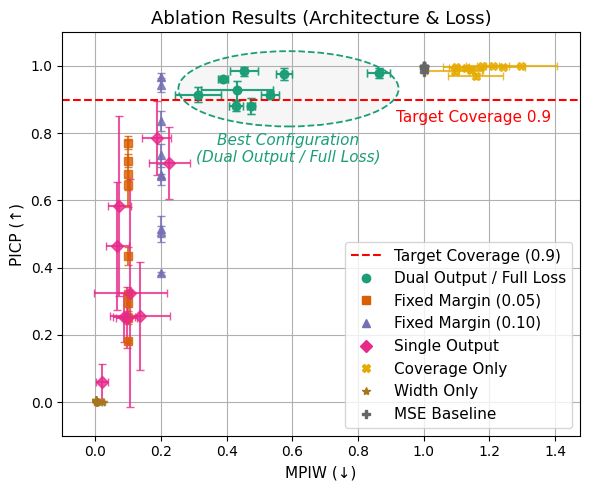

In [78]:
from matplotlib.patches import Ellipse
def plot_dataset_scatter(ax, config_dict, highlight_config=None, custom_labels=None, seen_labels=None):
    if seen_labels is None:
        seen_labels = set()
    highlight_coords = []

    for config_label, config_key in config_dict.items():
        label_to_show = custom_labels.get(config_label, config_label) if custom_labels else config_label
        color = config_color_map[config_label]
        marker = config_marker_map[config_label]
        
        if config_label == "Full Loss":
            color = config_color_map["Dual Output"]
            marker = config_marker_map["Dual Output"]


        for dataset in datasets:
            csv_path = os.path.join(result_dir_base, f"{dataset}_ablation_summary.csv")
            if not os.path.exists(csv_path):
                continue
            df = pd.read_csv(csv_path)
            df_config = df[df["config"] == config_key]
            if df_config.empty:
                continue

            picp_mean = df_config[picp_col].mean()
            picp_std = df_config[picp_col].std()
            mpiw_mean = df_config[mpiw_col].mean()
            mpiw_std = df_config[mpiw_col].std()

            ax.errorbar(mpiw_mean, picp_mean,
                        xerr=mpiw_std, yerr=picp_std,
                        fmt=marker, color=color,
                        capsize=3, alpha=0.8)

            if config_label == highlight_config:
                highlight_coords.append((mpiw_mean, picp_mean))

        # 빈 점 찍기: 이미 본 label이면 생략
        if label_to_show not in seen_labels:
            ax.errorbar([], [], fmt=marker, color=color, label=label_to_show)
            seen_labels.add(label_to_show)

    return highlight_coords, seen_labels

fig, ax = plt.subplots(figsize=(6, 5))

custom_label_map = {
    "Dual Output": "Dual Output / Full Loss",
    "Full Loss": "Dual Output / Full Loss",
}

seen_labels = set()
highlight_coords = []
h1, seen_labels = plot_dataset_scatter(ax, architecture_variants, highlight_config="Dual Output", custom_labels=custom_label_map, seen_labels=seen_labels)
highlight_coords += h1
h2, seen_labels = plot_dataset_scatter(ax, loss_variants, highlight_config="Full Loss", custom_labels=custom_label_map, seen_labels=seen_labels)
highlight_coords += h2

# target coverage line
ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5, label='Target Coverage (0.9)')
ax.text(
    x=0.94 * ax.get_xlim()[1],  # 오른쪽 끝에서 살짝 왼쪽
    y=0.9 - 0.03,               # y=0.9 선보다 살짝 아래
    s='Target Coverage 0.9',
    color='red',
    ha='right',
    va='top',
    fontsize=11,
)

# highlight
if highlight_coords:
    coords = np.array(highlight_coords)
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)

    # 중심: 최소-최대 중간
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    # 가로, 세로 길이 계산 + 여유 추가
    x_range = x_max - x_min
    y_range = y_max - y_min
    width = x_range + 0.12  # 0.02씩 여유 추가 (좌우)
    height = y_range + 0.12 # 0.02씩 여유 추가 (상하)

    # Dual Output 색상 가져오기
    highlight_color = config_color_map["Dual Output"]

    ellipse_face = Ellipse(
        (x_center, y_center), width, height,
        edgecolor=None, facecolor='lightgray', alpha=0.2, zorder=0
    )
    ax.add_patch(ellipse_face)

    # (2) 그 다음 테두리만 그린 타원 (위쪽, zorder 높게)
    ellipse_edge = Ellipse(
        (x_center, y_center), width, height,
        edgecolor=highlight_color, facecolor='none',
        linestyle='--', linewidth=1.3, zorder=5
    )
    ax.add_patch(ellipse_edge)

    # 텍스트 추가
    ax.text(
        x_center, 
        y_center - 0.13,  # 중심보다 아래로
        'Best Configuration\n(Dual Output / Full Loss)',
        color=highlight_color,
        ha='center',
        va='top',
        fontsize=11,
        fontstyle='italic'
    )

ax.set_xlabel("MPIW (↓)", fontsize=11)
ax.set_ylabel("PICP (↑)", fontsize=11)
ax.set_title("Ablation Results (Architecture & Loss)", fontsize=13)
ax.set_xlim(left=-0.1)
ax.set_ylim([-0.1, 1.1])
ax.grid(True)

# legend deduplication
handles, labels = ax.get_legend_handles_labels()
unique = dict()
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
ax.legend(unique.values(), unique.keys(), loc='lower right', fontsize=11)

plt.tight_layout()
plt.savefig("../analysis/ablation/ablation_tradeoff_combined.pdf")
plt.show()
